<a href="https://colab.research.google.com/github/RicardoMourao-py/CliqueMax/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Redes Sociais: encontrando a clique máxima em um grafo.

- Aluno: Ricardo Mourão Rodrigues Filho

![Exemplo Clique](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png)


A análise de redes sociais (ARS) é uma abordagem oriunda de áreas tais como Sociologia, Psicologia Social e Antropologia. Tal abordagem estuda as ligações relacionais (*relational tie*) entre atores sociais. Os atores na ARS podem ser tanto pessoas e empresas, analisadas como unidades individuais, quanto unidades sociais coletivas como, por exemplo, departamentos dentro de uma organização, agências de serviço público em uma cidade, estados-nações de um continente, dentre outras. A ARS difere fundamentalmente de outros estudos pelo fato de que sua ênfase não é nos atributos (características) dos atores, mas nas ligações entre eles.

A ideia de uma clique em um grafo é relativamente simples. No nível mais geral, uma clique é um subconjunto de uma rede no qual os atores são mais próximos entre si do que com outros membros da rede. Em termo de laços de amizade, por exemplo, não é incomum encontrar grupos humanos que formam cliques baseando-se em idade, gênero, raça, etnia, religião, ideologia, e muitas coisas coisas. Uma clique é, portanto, um conjunto de vértices em um grafo em que cada par de vértices está diretamente conectado por uma aresta.

Encontrar a clique máxima em um grafo é uma tarefa computacionalmente desafiadora devido à natureza combinatória do problema.  A dificuldade computacional surge da necessidade de explorar todas as combinações possíveis de vértices para identificar a maior clique, o que se torna exponencial em relação ao número de vértices. Isso resulta em uma complexidade computacional alta, mesmo para grafos moderadamente grandes.

A importância de estudar cliques está notavelmente presente na análise de redes sociais, onde as cliques representam grupos coesos de indivíduos que compartilham interesses, amizades ou conexões em comum. A identificação de cliques ajuda a entender a estrutura de uma rede social, identificar influenciadores e grupos de afinidade, além de auxiliar na detecção de comunidades e na análise de dinâmicas sociais.

As cliques são importantes, pois além de desenvolver em seus membros comportamentos homogêneos, elas têm, por definição, grande proximidade, aumentando a velocidade das trocas. Assim, informações dirigidas a uma clique são rapidamente absorvidas pelos seus membros, que tendem a percebê-las de forma semelhante. Isso é importante, por exemplo, em estratégias de segmentação.

Portanto, a resolução eficiente do problema da clique máxima tem aplicações valiosas em áreas que vão desde a ciência da computação até a análise de dados em redes sociais.

Logo, com o intuito de analisar esse problema, este notebook vai estudar implementações que podem ajudar na mitigação deste cenário. Sendo elas:

- **Busca Exaustiva**: A exaustão é uma abordagem que seleciona iterativamente os vértices para formar um clique, geralmente começando com um vértice e adicionando outros que tenham o maior número de vizinhos já na clique. Sendo assim, vamos explorar todas as cliques presentes no grafo  e selecionar a que tem maior tamanho.
- **Heurística**: Análise de todas as cliques do grafo, escolhendo a quantidade de arestas que um nó possui (Adjacência).
- **OpenMP**: A implementação de uma solução com OpenMP para encontrar cliques em um grafo envolve a paralelização das iterações do algoritmo em diferentes threads. O OpenMP simplifica a criação de threads e a coordenação entre elas.
- **MPI**: Nesta implementação, dividimos o problema em várias partes e distribuímos para diferentes processadores usando a biblioteca MPI (Message Passing Interface). Cada processador será responsável por encontrar cliques em uma parte do grafo, e os resultados serão combinados no final para encontrar todas as cliques no grafo.

## Setup

In [1]:
!git clone https://github.com/RicardoMourao-py/CliqueMax
%cd "CliqueMax"
!pip install -r requirements.txt

Cloning into 'CliqueMax'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 103 (delta 46), reused 70 (delta 28), pack-reused 0
Receiving objects: 100% (103/103), 602.77 KiB | 5.11 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/CliqueMax


## Bibliotecas

In [2]:
import os
import subprocess
import time
from datetime import datetime
import matplotlib.pyplot as plt

## Permissão para Compilados

In [3]:
!chmod +x compilacoes/heuristica/clique_heuristica_20
!chmod +x compilacoes/heuristica/clique_heuristica_40
!chmod +x compilacoes/heuristica/clique_heuristica_60
!chmod +x compilacoes/heuristica/clique_heuristica_80
!chmod +x compilacoes/heuristica/clique_heuristica_100
!chmod +x compilacoes/heuristica/clique_heuristica_120

In [4]:
!chmod +x compilacoes/exaustiva/clique_exaustivo_20
!chmod +x compilacoes/exaustiva/clique_exaustivo_40
!chmod +x compilacoes/exaustiva/clique_exaustivo_60
!chmod +x compilacoes/exaustiva/clique_exaustivo_80
!chmod +x compilacoes/exaustiva/clique_exaustivo_100
!chmod +x compilacoes/exaustiva/clique_exaustivo_120

In [5]:
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_20
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_40
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_60
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_80
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_100
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_120

## Tempo de Execução vs Tamanho Grafo

Antes da explicação de cada implementação, os resultados de tempo de execução a medida que o tamanho do grafo aumenta são diferentes do esperado, pois apesar de conseguir resolver exaustivamente o problema e o tamanho do grafo aumentar, o tempo de processamento para um mesmo tamanho foi maior. Sendo assim, conseguimos definir que computação distribuída ou paralelizações nem sempre resultará em um tempo de execução mais rápido. A eficácia da paralelização depende de vários fatores, incluindo a natureza do problema, a quantidade de trabalho que pode ser dividida em paralelo, a comunicação necessária entre os diferentes processos ou threads, e a arquitetura do sistema. Observe os resultados abaixo:

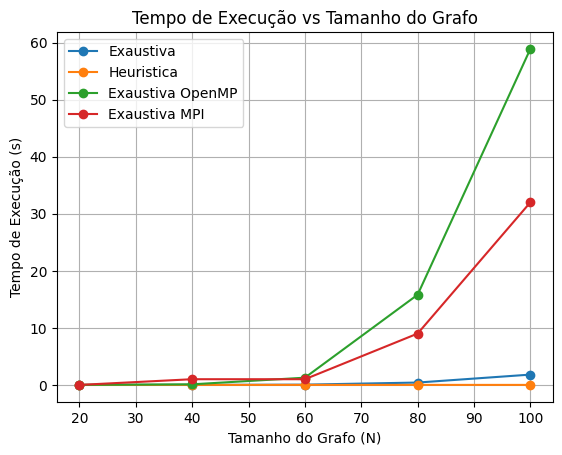

In [6]:
# arquivos executaveis
compilados_exaustiva = sorted(map(lambda x: os.path.join("compilacoes/exaustiva/", x), os.listdir("compilacoes/exaustiva/")), key=lambda x: int(x.split("_")[-1]))
compilados_heurisitca = sorted(map(lambda x: os.path.join("compilacoes/heuristica/", x), os.listdir("compilacoes/heuristica/")), key=lambda x: int(x.split("_")[-1]))
compilados_exaustiva_omp = sorted(map(lambda x: os.path.join("compilacoes/exaustiva-omp/", x), os.listdir("compilacoes/exaustiva-omp/")), key=lambda x: int(x.split("_")[-1]))
output_exaustiva_mpi = sorted(map(lambda x: os.path.join("out_mpi/", x), os.listdir("out_mpi/")), key=lambda x: int(x.split(".out")[0].split("_")[-1]))

tempos_exaustiva = []
tempos_heuristica = []
tempos_exaustiva_omp  = []
tempos_exaustiva_mpi = []

for i in output_exaustiva_mpi[:-1]:
  with open(i, 'r') as file:
      content = file.read()
      out = content.split('\n')
      time1 = datetime.strptime(out[0], '%H:%M:%S')
      time2 = datetime.strptime(out[2], '%H:%M:%S')
      delta = (time2 - time1).total_seconds()
      tempos_exaustiva_mpi.append(delta)

size_graph = list(range(20,120,20))

for i in range(len(size_graph)):
    comando = [compilados_exaustiva[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_exaustiva = fim - inicio
    tempos_exaustiva.append(tempo_execucao_exaustiva)

    comando = [compilados_heurisitca[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_heuristica = fim - inicio
    tempos_heuristica.append(tempo_execucao_heuristica)

    comando = [compilados_exaustiva_omp[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_exaustiva_omp = fim - inicio
    tempos_exaustiva_omp.append(tempo_execucao_exaustiva_omp)


# Crie o gráfico
plt.plot(size_graph, tempos_exaustiva, label="Exaustiva", marker='o')
plt.plot(size_graph, tempos_heuristica, label="Heuristica", marker='o')
plt.plot(size_graph, tempos_exaustiva_omp, label="Exaustiva OpenMP", marker='o')
plt.plot(size_graph, tempos_exaustiva_mpi, label="Exaustiva MPI", marker='o')
plt.xlabel("Tamanho do Grafo (N)")
plt.ylabel("Tempo de Execução (s)")
plt.legend()
plt.title("Tempo de Execução vs Tamanho do Grafo")

# Exiba o gráfico
plt.grid(True)
plt.show()

De acordo com os resultados acima, percebemos que as paralelizações não processaram em um tempo melhor que a exaustiva, portanto, as considerações abaixo devem ser consideradas:

- **Natureza do Problema**: Se o problema não puder ser dividido em tarefas independentes, a paralelização pode não oferecer benefícios significativos.

- **Quantidade de Trabalho Paralelizável**: Se o trabalho for altamente sequencial, com dependências entre as etapas, pode haver limitações na paralelização efetiva.

- **Comunicação entre Processos/Threads**: Se a comunicação entre os processos ou threads for intensiva, os custos de comunicação podem superar os benefícios da paralelização.

- **Arquitetura do Sistema**: A eficácia da paralelização pode depender da arquitetura do sistema. Alguns problemas são mais adequados para paralelização em sistemas distribuídos (MPI), enquanto outros podem ser mais eficientemente paralelizados em sistemas de memória compartilhada (OpenMP). Com isso, a disponibilidade de máquinas do Google Colab devem ser analisadas.

- **Overhead de Paralelização**: A introdução de paralelização pode adicionar overhead de gerenciamento de tarefas, sincronização, etc. Isso pode afetar negativamente o desempenho, especialmente para problemas pequenos onde o overhead relativo pode ser significativo.

## Executando todas Implementações

Apesar do tempo de execução não refletir no desempenho, perceba abaixo que as três implementações garantem o mesmo tamanho da clique máxima encontrada e garantem os mesmos resultados, em que é totalmente plausível visto que paralelizações não devem alterar os resultados.

In [7]:
print("--------------------- Exaustiva -------------------")
!compilacoes/exaustiva/clique_exaustivo_60
print("--------------------- Heuristica -------------------")
!compilacoes/heuristica/clique_heuristica_60
print("------------------ Exaustiva OpenMP -----------------")
!compilacoes/exaustiva-omp/clique_exaustivo_omp_60
print("--------------------- Exaustiva MPI -------------------")
with open('out_mpi/slurm_60.out', 'r') as file:
  content = file.read()
  print(content.split('\n')[1])
print("----------- Clique Máximo (Verificação) -------------")
!python3 utils/clique_correto.py

--------------------- Exaustiva -------------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]
--------------------- Heuristica -------------------
Clique máxima encontrada: [9, 11, 12, 14, 18, 20, 35, 43, 51, 59, 60]
------------------ Exaustiva OpenMP -----------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]
--------------------- Exaustiva MPI -------------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]
----------- Clique Máximo (Verificação) -------------
Clique máxima encontrada: [9, 11, 12, 13, 24, 34, 35, 40, 46, 51, 55, 60]


Portanto, as células abaixo explicam como foi realizada as implementações e as possíveis melhorias e causas do alto tempo de execução.

## Abordagem Exaustiva



Em todas implementaçãoes, serão usadas compilações já realizadas e que se encontram na pasta `CliqueMax/compilacoes`, visto que é necessário seguir uma padronização, já que MPI não pode ser executado no Colab. Contudo, caso o usuário queira analisar os resultados gerando um novo grafo, basta executar o comando em uma célula: `!python3 utils/gera_grafo.py`

Observe no código abaixo as seguintes considerações:

- **Função EncontraTodosCliquesMax**: Esta função encontra todas as cliques máximas no grafo usando um algoritmo de busca exaustiva. A ideia é iterar sobre todos os vértices como ponto de partida, construindo cliques máximas por meio de chamadas recursivas. A função mantém três vetores: candidatos (vértices candidatos a serem adicionados à clique), cliqueAtual (clique em construção) e cliqueMaximo (clique máxima encontrada). A função é chamada recursivamente até que todos os vértices sejam considerados como parte da clique. Ao final, a clique máxima é atualizada se uma nova clique máxima for encontrada.

- **Função Main**: A função principal do programa. Ela chama a função LerGrafo para obter o grafo a partir do arquivo "grafo.txt" e, em seguida, inicializa vetores necessários para a execução da função EncontraTodosCliquesMax. Após encontrar todas as cliques máximas, o programa imprime a clique máxima encontrada.

- **Impressão da Clique Máxima**: A clique máxima encontrada é impressa na tela, e os vértices são ordenados antes da impressão. Cada vértice é impresso com seu índice mais 1, para corresponder à indexação dos vértices no formato do arquivo de entrada.

Em resumo, o código lê um grafo de um arquivo, encontra todas as cliques máximas no grafo não direcionado usando busca em profundidade e imprime a clique máxima encontrada.

``` c
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

void EncontraTodosCliquesMax(vector<vector<int>>& grafo, vector<int>& candidatos, vector<int>& cliqueAtual, vector<int>& cliqueMaximo) {
    if (candidatos.empty()) {
        // Verifica se o clique atual é um clique (todos os vértices conectados entre si)
        bool ehClique = true;
        for (size_t i = 0; i < cliqueAtual.size() - 1 && ehClique; ++i) {
            for (size_t j = i + 1; j < cliqueAtual.size() && ehClique; ++j) {
                if (grafo[cliqueAtual[i]][cliqueAtual[j]] == 0) {
                    ehClique = false;
                }
            }
        }

        if (ehClique && cliqueAtual.size() > cliqueMaximo.size()) {
            cliqueMaximo = cliqueAtual;
        }

        return;
    }

    // usa uma cópia dos candidatos
    vector<int> candidatosCopia = candidatos;

    while (!candidatosCopia.empty()) {
        int v = candidatosCopia.back();
        candidatosCopia.pop_back();

        // Inicia com o vértice atual
        cliqueAtual.push_back(v);

        // atualiza a lista de candidatos
        vector<int> novosCandidatos;
        for (size_t i = 0; i < candidatosCopia.size(); ++i) {
            int u = candidatosCopia[i];
            if (grafo[v][u] == 1) {
                novosCandidatos.push_back(u);
            }
        }

        EncontraTodosCliquesMax(grafo, novosCandidatos, cliqueAtual, cliqueMaximo);
        cliqueAtual.pop_back();
    }
}


int main() {
    int numVertices;
    vector<vector<int>> grafo;
    vector<int> candidatos;
    vector<int> cliqueAtual;
    vector<int> cliqueMaximo;

    grafo = LerGrafo("grafo.txt", numVertices);
    numVertices = grafo.size();
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }

    EncontraTodosCliquesMax(grafo, candidatos, cliqueAtual, cliqueMaximo);
    sort(cliqueMaximo.begin(),cliqueMaximo.end(), [](auto& i, auto& j){return i < j;});

    cout << "Clique máxima encontrada: [";
    for (size_t i = 0; i < cliqueMaximo.size(); ++i) {
        cout << cliqueMaximo[i] + 1;
        if (i < cliqueMaximo.size() - 1) {
            cout << ", ";
        }
    }
    cout << "]" << endl;

    return 0;
}
```

Para compilar e executar:
```
!g++ -Wall -O3 -g src/clique_exaustivo.cpp -o clique_exaustivo
!./clique_exaustivo
````

 ## Abordagem Heurística

Certamente, podemos adicionar uma heurística para otimizar o algoritmo exaustivo. Além disso, podemos implementar uma poda para evitar o cálculo de ramos que sabemos antecipadamente que não levarão a uma solução melhor. Uma abordagem comum é usar a ideia de limites superiores (upper bounds) e limites inferiores (lower bounds).

De acordo com o pseudocódigo fornecido, foi implementada a heurística de ordenação por grau e uma poda usando limites superiores e inferiores:

``` c
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
using namespace std;


bool CompararPorGrau(const pair<int, int>& a, const pair<int, int>& b) {
    return a.second < b.second;
}

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

vector<int> EncontrarCliqueMaxima(vector<vector<int>>& grafo, int numVertices) {
    vector<int> cliqueMaxima;
    vector<pair<int, int>> graus;  // Armazena pares (nó, grau)

    // Calcular grau de cada nó
    for (int i = 0; i < numVertices; ++i) {
        int grau = 0;
        for (int j = 0; j < numVertices; ++j) {
            grau += grafo[i][j];
        }
        graus.push_back({i, grau});
    }

    // Ordenar nós por grau em ordem decrescente
    sort(graus.begin(), graus.end(), CompararPorGrau);

    while (!graus.empty()) {
        int v = graus.back().first;
        graus.pop_back();

        bool podeAdicionar = true;

        for (int u : cliqueMaxima) {
            if (grafo[u][v] == 0) {
                podeAdicionar = false;
                break;
            }
        }

        if (podeAdicionar) {
            cliqueMaxima.push_back(v);
            vector<pair<int, int>> novosGraus;

            // Atualizar graus removendo nós não adjacentes a v
            for (auto& par : graus) {
                int u = par.first;

                if (grafo[u][v] == 1) {
                    novosGraus.push_back(par);
                }
            }

            graus = novosGraus;
        }
    }

    return cliqueMaxima;
}


int main() {
    int numVertices;
    vector<vector<int>> grafo;

    grafo = LerGrafo("grafo.txt", numVertices);
    vector<int> cliqueMaximo = EncontrarCliqueMaxima(grafo, numVertices);
    sort(cliqueMaximo.begin(),cliqueMaximo.end(), [](auto& i, auto& j){return i < j;});

    cout << "Clique máxima encontrada: [";
    for (size_t i = 0; i < cliqueMaximo.size(); ++i) {
        cout << cliqueMaximo[i] + 1;
        if (i < cliqueMaximo.size() - 1) {
            cout << ", ";
        }
    }
    cout << "]" << endl;

    return 0;
}
```


- **Função CompararPorGrau**: Essa função é usada para comparar dois pares (nó, grau) durante a ordenação. Ela retorna true se o grau do primeiro par é menor que o grau do segundo par.

- **Função EncontrarCliqueMaxima**: Essa função recebe a matriz de adjacência do grafo e o número de vértices como parâmetros.
Ela utiliza uma abordagem gulosa para encontrar a clique máxima:
Calcula o grau de cada nó e os armazena em um vetor de pares (nó, grau).
Ordena esse vetor em ordem decrescente de grau.
Itera sobre os nós ordenados e adiciona um nó à clique máxima se ele for adjacente a todos os nós já presentes na clique.
Atualiza a lista de nós ordenados removendo aqueles que não são adjacentes ao nó adicionado.

- **Função main**: Na função principal, é lido o grafo de um arquivo chamado "grafo.txt".
Em seguida, chama a função EncontrarCliqueMaxima para encontrar a clique máxima.
Ordena os elementos da clique máxima.
Imprime a clique máxima encontrada.

Para compilar e executar:

```
!g++ -Wall -O3 -g src/clique_heuristica.cpp -o clique_heuristica
!./clique_heuristica

```

## Threads OpenMP

Esta implementação visa paralelizar o código da exaustiva anteriormente com a diretiva OpenMP, que é uma API para programação paralela em C, C++, e Fortran. As principais partes do código relacionadas à paralelização:

- **Leitura Paralela do Grafo**: Na função LerGrafo, a leitura das arestas do grafo é paralelizada usando a diretiva #pragma omp parallel for.
Cada thread é responsável por ler uma parte das arestas do arquivo, evitando conflitos de leitura.
A região crítica (#pragma omp critical) é usada para garantir que a leitura do arquivo seja feita de forma exclusiva por uma única thread por vez, evitando problemas de concorrência na leitura.

- **Verificação de Clique Paralela**: Dentro da função EncontraTodosCliquesMax, há uma verificação paralela para determinar se o conjunto de vértices atual (cliqueAtual) forma uma clique.
A verificação é feita usando dois loops aninhados, onde cada thread é responsável por verificar uma parte do conjunto de vértices.
A cláusula #pragma omp atomic write é usada para garantir que a variável ehClique seja escrita de forma atômica, evitando condições de corrida.

- **Geração Paralela de Cliques**: A função EncontraTodosCliquesMax utiliza recursão para gerar todas as cliques máximas no grafo.
A recursão é paralelizada, e cada chamada recursiva é realizada por uma thread diferente.
O conjunto de candidatos é atualizado de forma paralela para melhorar a eficiência.

``` c
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <omp.h>
using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    #pragma omp parallel for
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        #pragma omp critical
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

void EncontraTodosCliquesMax(vector<vector<int>>& grafo, vector<int>& candidatos, vector<int>& cliqueAtual, vector<int>& cliqueMaximo) {
    if (candidatos.empty()) {
        // Verifica se o clique atual é um clique (todos os vértices conectados entre si)
        bool ehClique = true;
        for (size_t i = 0; i < cliqueAtual.size() - 1 && ehClique; ++i) {
            #pragma omp parallel for
            for (size_t j = i + 1; j < cliqueAtual.size(); ++j) {
                // Use a cláusula if para verificar ehClique dentro do loop
                if (ehClique) {
                    if (grafo[cliqueAtual[i]][cliqueAtual[j]] == 0) {
                        #pragma omp atomic write
                        ehClique = false;  // Sinaliza que ehClique deve ser definido como falso
                    }
                }
            }
        }
        if (ehClique && cliqueAtual.size() > cliqueMaximo.size()) {
            cliqueMaximo = cliqueAtual;
        }

        return;
    }

    // usa uma cópia dos candidatos
    vector<int> candidatosCopia = candidatos;

    while (!candidatosCopia.empty()) {
        int v = candidatosCopia.back();
        candidatosCopia.pop_back();

        // Inicia com o vértice atual
        cliqueAtual.push_back(v);

        // atualiza a lista de candidatos
        vector<int> novosCandidatos;
        for (size_t i = 0; i < candidatosCopia.size(); ++i) {
            int u = candidatosCopia[i];
            if (grafo[v][u] == 1) {
                novosCandidatos.push_back(u);
            }
        }

        EncontraTodosCliquesMax(grafo, novosCandidatos, cliqueAtual, cliqueMaximo);
        cliqueAtual.pop_back();
    }
}


int main() {
    int numVertices;
    vector<vector<int>> grafo;
    vector<int> candidatos;
    vector<int> cliqueAtual;
    vector<int> cliqueMaximo;

    grafo = LerGrafo("grafo.txt", numVertices);
    numVertices = grafo.size();
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }

    EncontraTodosCliquesMax(grafo, candidatos, cliqueAtual, cliqueMaximo);
    sort(cliqueMaximo.begin(),cliqueMaximo.end(), [](auto& i, auto& j){return i < j;});

    cout << "Clique máxima encontrada: [";
    for (size_t i = 0; i < cliqueMaximo.size(); ++i) {
        cout << cliqueMaximo[i] + 1;
        if (i < cliqueMaximo.size() - 1) {
            cout << ", ";
        }
    }
    cout << "]" << endl;

    return 0;
}
```

### SpeedUp

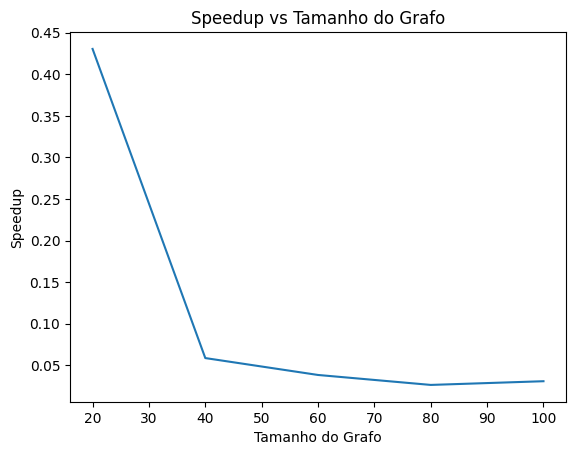

In [11]:
speedups = []
for (x,y) in zip(tempos_exaustiva,tempos_exaustiva_omp):
  speedups.append(x/y)

plt.plot(size_graph, speedups)
plt.ylabel('Speedup')
plt.xlabel('Tamanho do Grafo')
plt.title('Speedup vs Tamanho do Grafo')
plt.show()

In [10]:
speedup = (sum(tempos_exaustiva) / len(tempos_exaustiva)) / (sum(tempos_exaustiva_omp) / len(tempos_exaustiva_omp))
print(f"Speedup: {speedup:.2f}")

Speedup: 0.03


De acordo com o nosso SpeedUp, as possíveis causas são overhead, na qual dependendo do tamanho do problema, o custo de criar e coordenar threads pode superar os benefícios do paralelismo, especialmente se o trabalho em cada thread for relativamente pequeno. Além disso, O uso de regiões críticas (`#pragma omp critical`) e operações atômicas (`#pragma omp atomic`) pode levar à sincronização excessiva entre as threads. Se as seções críticas forem frequentemente acionadas, as threads podem ficar à espera, resultando em overhead. Ademais, a escolha do número de threads pode impactar o desempenho. Se o número de threads for muito grande em comparação com o número de núcleos de CPU disponíveis, pode haver overhead de troca de contexto e competição por recursos.

Para compilar e executar:
```
!g++ -Wall -O3 -g -fopenmp src/clique_exaustivo_omp.cpp -o clique_exaustivo_omp
!./clique_exaustivo_omp
```

## Computação Distribuída com MPI

O código abaixo implementa o nosso algoritmo para encontrar cliques máximas em um grafo não direcionado usando MPI (Message Passing Interface) com computação paralela. As principais partes do código relacionadas à implementação MPI:

- **Inicialização MPI**: A função `MPI_Init` é chamada para inicializar o ambiente MPI. `MPI_Comm_size` e `MPI_Comm_rank` são usadas para obter o número total de processos (numProcessos) e o identificador do processo atual (processoAtual).

- **Divisão de Tarefas**: O processo 0 (processoAtual == 0) é responsável por ler o grafo do arquivo, inicializar os candidatos e realizar algumas operações iniciais.
O número total de vértices é transmitido a todos os processos usando `MPI_Bcast`.
Os candidatos são divididos entre os processos. Cada processo recebe uma parte dos candidatos.

- **Execução Paralela da Função**: Cada processo executa a função EncontraTodosCliquesMax com seus próprios candidatos locais.
A função recebe um conjunto de candidatos locais e encontra as cliques máximas locais para esse conjunto.

- **Combinação dos Resultados**: O processo 0 coleta os resultados de todos os outros processos.
Usando `MPI_Recv`, o processo 0 recebe os resultados dos outros processos e compara-os com sua própria clique máxima.
O processo 0 mantém a maior clique máxima global.

- **Envio dos Resultados**: Os processos não-zero enviam suas cliques máximas locais para o processo 0 usando `MPI_Send`.

- **Exibição do Resultado Final**: O processo 0 exibe o resultado final ordenando a clique máxima global e imprimindo-a.

- **Finalização MPI**: A função `MPI_Finalize` é chamada para finalizar o ambiente MPI.


- **Timestamp**: A função timestamp é utilizada para imprimir um timestamp indicando o momento de início e término da execução.

A implementação MPI permite a execução paralela da função EncontraTodosCliquesMax em diferentes conjuntos de candidatos. A comunicação MPI é usada para transmitir informações entre os processos, incluindo o número total de vértices, os candidatos locais e os resultados das cliques máximas locais. A sincronização e a coleta de resultados são realizadas pelo processo 0.

``` c
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <mpi.h>
#include <ctime>
using namespace std;

void timestamp();

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

void EncontraTodosCliquesMax(vector<vector<int>>& grafo, vector<int>& candidatos, vector<int>& cliqueAtual, vector<int>& cliqueMaximo) {
    if (candidatos.empty()) {
        // Verifica se o clique atual é um clique (todos os vértices conectados entre si)
        bool ehClique = true;
        for (size_t i = 0; i < cliqueAtual.size() - 1 && ehClique; ++i) {
            for (size_t j = i + 1; j < cliqueAtual.size() && ehClique; ++j) {
                if (grafo[cliqueAtual[i]][cliqueAtual[j]] == 0) {
                    ehClique = false;
                }
            }
        }

        if (ehClique && cliqueAtual.size() > cliqueMaximo.size()) {
            cliqueMaximo = cliqueAtual;
        }

        return;
    }

    // usa uma cópia dos candidatos
    vector<int> candidatosCopia = candidatos;

    while (!candidatosCopia.empty()) {
        int v = candidatosCopia.back();
        candidatosCopia.pop_back();

        // Inicia com o vértice atual
        cliqueAtual.push_back(v);

        // atualiza a lista de candidatos
        vector<int> novosCandidatos;
        for (size_t i = 0; i < candidatosCopia.size(); ++i) {
            int u = candidatosCopia[i];
            if (grafo[v][u] == 1) {
                novosCandidatos.push_back(u);
            }
        }

        EncontraTodosCliquesMax(grafo, novosCandidatos, cliqueAtual, cliqueMaximo);
        cliqueAtual.pop_back();
    }
}


int main(int argc, char** argv) {
    timestamp();
    
    MPI_Init(&argc, &argv);

    int numProcessos, processoAtual;
    MPI_Comm_size(MPI_COMM_WORLD, &numProcessos);
    MPI_Comm_rank(MPI_COMM_WORLD, &processoAtual);

    int numVertices;
    vector<vector<int>> grafo;
    vector<int> candidatos;
    vector<int> cliqueAtual;
    vector<int> cliqueMaximo;

    if (processoAtual == 0) {
        grafo = LerGrafo("amostra_grafos/grafo_120.txt", numVertices);
        numVertices = grafo.size();
        for (int i = 0; i < numVertices; ++i) {
            candidatos.push_back(i);
        }
    }

    // Broadcast do número de vértices para todos os processos
    MPI_Bcast(&numVertices, 1, MPI_INT, 0, MPI_COMM_WORLD);

    // Divide os candidatos entre os processos
    int tamanhoBloco = candidatos.size() / numProcessos;
    int inicio = processoAtual * tamanhoBloco;
    int fim = (processoAtual == numProcessos - 1) ? candidatos.size() : inicio + tamanhoBloco;
    vector<int> candidatosLocais(candidatos.begin() + inicio, candidatos.begin() + fim);

    // Broadcast dos candidatos locais para todos os processos
    MPI_Bcast(candidatosLocais.data(), candidatosLocais.size(), MPI_INT, 0, MPI_COMM_WORLD);

    // Cada processo executa a função EncontraTodosCliquesMax com seus candidatos locais
    EncontraTodosCliquesMax(grafo, candidatosLocais, cliqueAtual, cliqueMaximo);

    // Combinar os resultados - processo 0 recebe os resultados de outros processos
    if (processoAtual == 0) {
        for (int i = 1; i < numProcessos; ++i) {
            vector<int> cliqueMaximoRemoto;
            MPI_Recv(cliqueMaximoRemoto.data(), cliqueMaximoRemoto.size(), MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

            if (cliqueMaximoRemoto.size() > cliqueMaximo.size()) {
                cliqueMaximo = cliqueMaximoRemoto;
            }
        }
    } else {
        // Outros processos enviam seus resultados para o processo 0
        MPI_Send(cliqueMaximo.data(), cliqueMaximo.size(), MPI_INT, 0, 0, MPI_COMM_WORLD);
    }

    // Processo 0 exibe o resultado final
    if (processoAtual == 0) {
        sort(cliqueMaximo.begin(), cliqueMaximo.end(), [](auto& i, auto& j) { return i < j; });

        cout << "Clique máxima encontrada: [";
        for (size_t i = 0; i < cliqueMaximo.size(); ++i) {
            cout << cliqueMaximo[i] + 1;
            if (i < cliqueMaximo.size() - 1) {
                cout << ", ";
            }
        }
        cout << "]" << endl;
    }

    MPI_Finalize();

    timestamp();

    return 0;
}

void timestamp() {
   char time_buffer[40];
   time_t now = time(nullptr);
   tm *tm = localtime(&now);
   strftime(time_buffer, sizeof(time_buffer), "%I:%M:%S", tm);
   std::cout << time_buffer << std::endl;
}
```

### SpeedUp

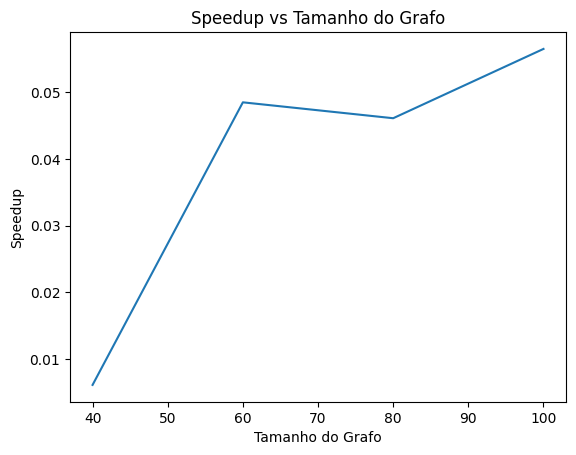

In [17]:
speedups = []
for (x,y) in zip(tempos_exaustiva, tempos_exaustiva_mpi):
  try:
    speedups.append(x/y)
  except:
    speedups.append(None)

plt.plot(size_graph, speedups)
plt.ylabel('Speedup')
plt.xlabel('Tamanho do Grafo')
plt.title('Speedup vs Tamanho do Grafo')
plt.show()

In [18]:
speedup = (sum(tempos_exaustiva) / len(tempos_exaustiva)) / (sum(tempos_exaustiva_mpi) / len(tempos_exaustiva_mpi))
print(f"Speedup: {speedup:.2f}")

Speedup: 0.05


Apesar de um melhor desempenho de tempo em relação ao OpenMP, o MPI ainda não forneceu melhorias adequadas devido ao seu speedup. Com isso, é importante ressaltar que os principais suspeitos são:

- **Comunicação Excessiva Em MPI**: a comunicação entre os processos é realizada por meio de mensagens. Se houver muita comunicação entre os processos, o overhead associado pode superar os benefícios do paralelismo.

- **Granularidade Inadequada**: A granularidade do paralelismo refere-se ao tamanho do trabalho realizado por cada processo. Se o trabalho em cada processo for muito pequeno, o overhead de comunicação pode dominar o tempo de execução.

- **Sobrecarga de Inicialização e Finalização MPI**: As operações de inicialização e finalização MPI (MPI_Init e MPI_Finalize) podem introduzir sobrecarga, especialmente em casos onde o trabalho total é pequeno.

- **Desbalanceamento de Carga**: Se a carga de trabalho não estiver distribuída uniformemente entre os processos, alguns processos podem ficar ociosos enquanto outros ainda estão computando. Isso pode ocorrer se a divisão de candidatos não for equitativa.

- **Escalabilidade Limitada do Problema**: Se o tamanho do problema não for grande o suficiente para justificar o paralelismo, os custos associados à inicialização e comunicação MPI podem superar os benefícios. Isso é especialmente verdadeiro para algoritmos onde a paralelização não oferece vantagens claras em relação ao tamanho do problema.

- **Complexidade do Algoritmo**: A complexidade do algoritmo em si pode limitar a eficácia da paralelização. Algoritmos que têm dependências fortes entre as iterações ou etapas podem não se beneficiar totalmente do paralelismo.

- **Configuração do Ambiente MPI**: A configuração do ambiente MPI, incluindo o número de processos e a máquina onde o programa está sendo executado, pode afetar o desempenho. Com isso, é importante ressaltar que a implementação com MPI foi executada no cluster do laboratório de supercomputação do Insper e o arquivo de configuração do SLURM foi o seguinte:
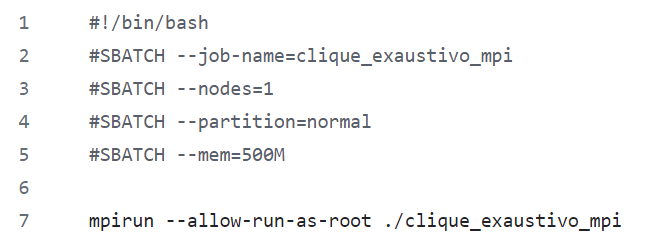

Para compilar e executar no seu cluster com as configurações corretas do SLURM:
```
mpic++ src/clique_exaustivo_mpi.cpp -o clique_exaustivo_mpi
# crie clique_exaustivo_mpi.slurm
sbatch clique_exaustivo_mpi.slurm
# visualize o output
```

## Conclusão

Para otimizar a implementação paralela com OpenMP, é importante ajustar a granularidade do paralelismo, minimizar a sincronização e experimentar diferentes configurações de número de threads. Além disso, em certos casos, pode ser benéfico aplicar paralelismo apenas em partes críticas do código. A análise do perfil de desempenho, usando ferramentas como o OpenMP profiler, pode ajudar a identificar gargalos específicos e orientar otimizações.

Ademais, na implementação de MPI é importante verificar se as operações de comunicação, como `MPI_Bcast`, `MPI_Send` e `MPI_Recv`, são necessárias e otimizadas. Além disso, experimentar ajustar a granularidade para encontrar um equilíbrio que beneficie o paralelismo. Outrossim, verificar se o tempo de inicialização e finalização for significativo em comparação com o tempo de computação, pois isso pode afetar o desempenho. Por fim, verificar as configurações do SLURM no seu cluster é de fundamental importância.